[[ 2차 시험 : 분류모델의 성능평가 ]]  
1.
싸이런킷에서 제공하는 분석용 데이터를 임시로   
특성 20개까지 데이터 10000개를  
만들어라.(동일한 성능을 내기 위해 난수씨드를   
고정해도 괜찮음)  
2.  
아래 5개의 분류기를 이용하여   
예측 성능 평가를 진행하라  
- 결정트리분류  
- 로지스틱회귀  
- 랜덤포레스트분류  
- 서포트백터머신분류  
- 나이브베이즈  
3. 
성능 평가 결과는   
- ROC curve 시각화 자료  
- AUC 값  
2가지를 기초로 결과를 제시하시오  

In [1]:
import sklearn.datasets as mls
import pandas as pd

In [2]:
#분류파일 생성 n_samples=10000, n_features=20
data = mls.make_classification(n_samples=10000, n_features=20)

In [3]:
X,Y= data # 데이터를 data와 train으로 쪼갠다.

In [4]:
data_X = pd.DataFrame(X,columns=[col for col in range(20)])

In [5]:
data_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.323305,2.454031,-0.553098,-1.669161,-1.166383,-1.144523,2.131862,-0.358059,-0.394504,-0.827090,1.169078,-0.497384,-1.123786,-0.635685,0.516228,0.638217,-0.951357,0.372981,-1.235541,0.467539
1,-0.766969,-0.272508,-0.169867,0.219693,0.298727,-0.509693,-0.069966,0.479066,-2.463342,-0.751301,-2.161361,-0.831130,-0.883439,-0.938089,1.910253,0.037202,-1.286022,-0.262389,0.410780,-0.335219
2,-1.308476,-1.921073,-1.781207,1.635418,2.532939,-1.753203,-0.210470,0.514545,-1.148224,1.143400,-0.825163,0.025616,0.069335,-1.173964,-0.838968,0.560471,0.112214,0.303362,-0.260348,-0.559099
3,-1.594238,-0.923966,-0.915200,0.795263,1.261052,0.998397,0.728491,0.141526,0.125140,-1.937115,-0.598584,-0.525275,-0.202690,-0.079665,0.581425,-1.279656,1.139010,-0.702165,-1.689960,-0.106122
4,1.293065,-0.415138,1.290590,0.104633,-0.678414,-0.253818,1.153624,0.272196,-1.574315,0.633322,1.649825,-0.575044,-0.618836,-0.106141,0.189232,-1.738695,0.424189,-1.013008,1.474273,-0.879335


In [7]:
data_Y=pd.Series(Y,name='label')

In [8]:
# 이진 분류 형태(true,false)
data_Y=[element==1 for element in data_Y]

In [9]:
data_Y=pd.Series(data_Y,name='label')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_X,test_X,train_Y,test_Y = train_test_split(data_X,data_Y)

In [12]:
# 데이터가 원하는 형태로 쪼개졌는지 확인.
train_X.shape

(7500, 20)

In [13]:
train_Y.shape

(7500,)

In [14]:
test_X.shape

(2500, 20)

In [15]:
test_Y

9063    False
8853    False
2779     True
8896    False
5667     True
9633    False
2582    False
3000    False
8847    False
6055     True
8392    False
3068    False
4675     True
6789    False
9610    False
3211     True
4736     True
3266    False
7453    False
605      True
7370    False
3464     True
8295     True
7472    False
3807     True
257      True
7748    False
163     False
9068     True
8785    False
        ...  
82      False
3446    False
7928    False
2328     True
713      True
2720     True
7145     True
3599     True
6105    False
566      True
8805     True
4814     True
6901     True
6475     True
1869    False
6451    False
8766    False
948      True
504     False
8770    False
8767     True
1689    False
6398    False
6369     True
465      True
3075     True
4182     True
4813     True
3708     True
2       False
Name: label, Length: 2500, dtype: bool

In [16]:
#roc 커브 
from sklearn.metrics import roc_curve
#로지스틱
from sklearn.linear_model import LogisticRegression
# 결정 트리 분류
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트 분류
from sklearn.ensemble import RandomForestClassifier
# 나이브베이즈 가우시안
from sklearn.naive_bayes import GaussianNB
#auc
from sklearn.metrics import auc 

In [17]:
#라벨,라인타입,모델 리스트(튜플)
CLASS_DICT = {
    # 키(분류기의 이름) : (시각화 선의 모양, 분류기 객체 )
    '로지스틱회귀':('-', LogisticRegression()),
    '결정트리분류':('--', DecisionTreeClassifier(max_depth=5) ),
    '랜덤포레스트':('.-', RandomForestClassifier(max_depth=5, n_estimators = 10, max_features=1 )),
    '나이브베이즈':(':', GaussianNB() )        
}

In [18]:
#시각화 한글화
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

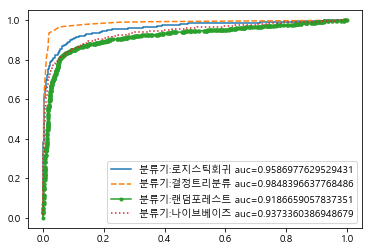

In [19]:
#시각화및 auc
for label,(line_type,model) in CLASS_DICT.items():
    #모델학습
    model.fit(train_X,train_Y)    
    pred = model.predict_proba(test_X)
    #계산할부분
    pre = pd.Series(pred[:,1])
    #roc커브에 필요한 계산
    fpr, tpr, threshold = roc_curve(test_Y,pre)
    #auc계산
    aucScore = auc(fpr,tpr)
    # auc값과 분류기 이름을 레이블로 등록
    label = '분류기:%s auc=%r' % (label,aucScore) 
    plt.plot(fpr,tpr,line_type, label=label)
#범례표시
plt.legend()
    
    
    
    
    
    
    
    

왼쪽 위를 향하는 그래프가 가장 좋으니 결정 트리가 가장 좋은걸 알 수 있다. 
auc 값을 비교 했을때 결정 트리가 0.984으로 가장 높음을 알 수 있다.  
따라서 결정 트리가 가장 분류를 잘하는 모델이라고 할 수 있다.  
